In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Lecture du fichier des metadonnées

In [2]:
# Chemin du fichier des métadonnées des REVENUS CSV
fichier_meta = "E://Projet_SQL//revenus_et_pauvrete_2021_meta.csv"
meta = pd.read_csv(fichier_meta, sep=';', encoding='utf-8')  # Ou iso-8859-1 si ça coince
print(meta.head(25))

            COD_VAR                                            LIB_VAR  \
0       NBMENFISC21                          Nombre de ménages fiscaux   
1   NBPERSMENFISC21       Nombre de personnes dans les ménages fiscaux   
2             MED21                          Médiane du niveau vie (€)   
3            PIMP21               Part des ménages fiscaux imposés (%)   
4            TP6021                      Taux de pauvreté-Ensemble (%)   
5        TP60AGE121               Taux de pauvreté-moins de 30 ans (%)   
6        TP60AGE221                  Taux de pauvreté-30 à 39 ans  (%)   
7        TP60AGE321                   Taux de pauvreté-40 à 49 ans (%)   
8        TP60AGE421                   Taux de pauvreté-50 à 59 ans (%)   
9        TP60AGE521                   Taux de pauvreté-60 à 74 ans (%)   
10       TP60AGE621                Taux de pauvreté-75 ans ou plus (%)   
11       TP60TOL121                 Taux de pauvreté-propriétaires (%)   
12       TP60TOL221                   

In [3]:
print(meta.shape)

(125, 7)


In [4]:
# Afficher le résumé du DataFrame :
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   COD_VAR       125 non-null    object
 1   LIB_VAR       125 non-null    object
 2   LIB_VAR_LONG  125 non-null    object
 3   COD_MOD       98 non-null     object
 4   LIB_MOD       98 non-null     object
 5   TYPE_VAR      125 non-null    object
 6   LONG_VAR      125 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 7.0+ KB


2. Lecture du fichier des revenus

In [5]:
# Chemin du fichier de REVENUS CSV
chemin_fichier = "E://Projet_SQL//revenus_et_pauvrete_2021_DEP.csv"
df = pd.read_csv(chemin_fichier, sep=';', encoding='utf-8')  # Ou iso-8859-1 si ça coince
print(df.head(5))

  CODGEO  NBMENFISC21  NBPERSMENFISC21  MED21 PIMP21 TP6021 TP60AGE121  \
0     01       270138           631871  24810   55,2   10,8       15,0   
1     02       224492           506628  20920   45,2   18,8       30,4   
2     03       160041           323483  21500   45,3   16,2       24,8   
3     04        72855           146996  21790   47,3   17,1       24,2   
4     05        65683           132943  22010   49,3   14,7       22,0   

  TP60AGE221 TP60AGE321 TP60AGE421  ... PPEN21 PPAT21 PPSOC21 PPFAM21  \
0       11,8       12,1       10,3  ...   24,7    8,3     3,8     1,7   
1       23,3       21,2       17,7  ...   30,5    7,2     7,7     2,6   
2       20,5       18,3       16,1  ...   37,3    8,4     6,5     1,8   
3       20,7       20,1       17,2  ...   36,4   12,7     5,5     1,6   
4       17,4       16,9       14,7  ...   36,2   10,0     5,2     1,7   

  PPMINI21 PPLOGT21 PIMPOT21   D121   D921 RD21  
0      1,4      0,7    -15,9  13510  46760  3,5  
1      3,6      

In [6]:
# Afficher la taille du df
print(df.shape)

(98, 28)


In [7]:
# Afficher le résumé du DataFrame :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODGEO           98 non-null     object
 1   NBMENFISC21      98 non-null     int64 
 2   NBPERSMENFISC21  98 non-null     int64 
 3   MED21            98 non-null     int64 
 4   PIMP21           98 non-null     object
 5   TP6021           98 non-null     object
 6   TP60AGE121       98 non-null     object
 7   TP60AGE221       98 non-null     object
 8   TP60AGE321       98 non-null     object
 9   TP60AGE421       98 non-null     object
 10  TP60AGE521       98 non-null     object
 11  TP60AGE621       98 non-null     object
 12  TP60TOL121       98 non-null     object
 13  TP60TOL221       98 non-null     object
 14  PACT21           98 non-null     object
 15  PTSA21           98 non-null     object
 16  PCHO21           98 non-null     object
 17  PBEN21           98 non-null     obje

### Analyse exploratoire du df

In [8]:
# Afficher un échantillon aléatoire de 5 lignes du DataFrame
df.sample(5)

,CODGEO,NBMENFISC21,NBPERSMENFISC21,MED21,PIMP21,TP6021,TP60AGE121,TP60AGE221,TP60AGE321,TP60AGE421,...,PPEN21,PPAT21,PPSOC21,PPFAM21,PPMINI21,PPLOGT21,PIMPOT21,D121,D921,RD21
86,86,189604,404303,22220,"48,8","14,7","28,4","17,1","15,4","13,3",...,"32,2","7,8","5,5","1,9","2,5","1,1","-14,6",12180,36440,"3,0"
17,18,139636,289977,22100,"49,2","14,7","23,8","18,5","17,1","13,7",...,"35,3","7,2","6,2","1,9","3,1","1,2","-14,2",12220,35950,"2,9"
20,22,281440,600827,22670,"49,3","11,8","18,6","13,5","13,2","11,6",...,"36,8","8,5","4,9","1,8","2,2","0,9","-14,3",13190,36550,"2,8"
67,67,481046,1080532,24090,"56,8","13,5","22,0","16,3","16,5","12,2",...,"27,0","8,6","4,6","1,7","2,0","0,9","-16,8",12480,41490,"3,3"
62,62,612380,1415534,20720,"44,1","18,4","29,1","22,2","19,9","16,6",...,"29,0","6,4","7,8","2,7","3,6","1,5","-13,8",11610,34420,"3,0"


In [9]:
# Afficher le type de chaque colonne pour vérifier si les données sont bien lues
df.dtypes

CODGEO             object
NBMENFISC21         int64
NBPERSMENFISC21     int64
MED21               int64
PIMP21             object
TP6021             object
TP60AGE121         object
TP60AGE221         object
TP60AGE321         object
TP60AGE421         object
TP60AGE521         object
TP60AGE621         object
TP60TOL121         object
TP60TOL221         object
PACT21             object
PTSA21             object
PCHO21             object
PBEN21             object
PPEN21             object
PPAT21             object
PPSOC21            object
PPFAM21            object
PPMINI21           object
PPLOGT21           object
PIMPOT21           object
D121                int64
D921                int64
RD21               object
dtype: object

In [10]:
# Convertir les colonnes de type 'object' (valeurs numériques mal lues comme du texte)
# en type 'float', après remplacement des virgules par des points décimaux.
# Exclure la colonne 'CODGEO' qui contient les nom et identifiants des départements.

colonnes_a_convertir = [col for col in df.columns if df[col].dtype == 'object' and col != 'CODGEO']

# Conversion en float après remplacement des virgules
for col in colonnes_a_convertir:
    df[col] = df[col].str.replace(',', '.').astype(float)


In [11]:
# Vérifier les types de variables
df.dtypes

CODGEO              object
NBMENFISC21          int64
NBPERSMENFISC21      int64
MED21                int64
PIMP21             float64
TP6021             float64
TP60AGE121         float64
TP60AGE221         float64
TP60AGE321         float64
TP60AGE421         float64
TP60AGE521         float64
TP60AGE621         float64
TP60TOL121         float64
TP60TOL221         float64
PACT21             float64
PTSA21             float64
PCHO21             float64
PBEN21             float64
PPEN21             float64
PPAT21             float64
PPSOC21            float64
PPFAM21            float64
PPMINI21           float64
PPLOGT21           float64
PIMPOT21           float64
D121                 int64
D921                 int64
RD21               float64
dtype: object

In [12]:
# Vérifier les changements de virgules par des points décimaux
df.sample(5)

,CODGEO,NBMENFISC21,NBPERSMENFISC21,MED21,PIMP21,TP6021,TP60AGE121,TP60AGE221,TP60AGE321,TP60AGE421,...,PPEN21,PPAT21,PPSOC21,PPFAM21,PPMINI21,PPLOGT21,PIMPOT21,D121,D921,RD21
5,06,536880,1107426,23460,55.2,16.4,23.1,18.2,18.3,15.8,...,28.9,12.8,4.7,1.4,2.3,1.0,-18.7,11450,43720,3.8
19,21,232935,493885,23720,55.8,11.8,21.3,13.4,13.3,11.2,...,30.4,9.1,4.7,1.7,2.1,0.9,-16.4,13150,39810,3.0
88,88,166405,349680,21550,46.3,15.3,24.1,19.2,17.8,14.8,...,34.0,7.8,5.9,1.9,2.8,1.2,-13.9,12110,35170,2.9
67,67,481046,1080532,24090,56.8,13.5,22.0,16.3,16.5,12.2,...,27.0,8.6,4.6,1.7,2.0,0.9,-16.8,12480,41490,3.3
86,86,189604,404303,22220,48.8,14.7,28.4,17.1,15.4,13.3,...,32.2,7.8,5.5,1.9,2.5,1.1,-14.6,12180,36440,3.0


In [13]:
# Afficher uniquement les colonnes qui contiennent des valeurs manquantes
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [14]:
# Afficher les statistiques descriptives (moyenne, médiane, quartiles, min, max, etc.)
# pour toutes les colonnes numériques du Dataframe
df.describe()

,NBMENFISC21,NBPERSMENFISC21,MED21,PIMP21,TP6021,TP60AGE121,TP60AGE221,TP60AGE321,TP60AGE421,TP60AGE521,...,PPEN21,PPAT21,PPSOC21,PPFAM21,PPMINI21,PPLOGT21,PIMPOT21,D121,D921,RD21
count,9.800000e+01,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2.934917e+05,6.508805e+05,22619.183673,50.453061,15.217347,23.085714,17.781633,16.997959,14.572449,11.718367,...,31.017347,8.840816,5.712245,1.903061,2.692857,1.116327,-15.358163,12179.897959,38784.795918,3.203061
std,2.180164e+05,4.964995e+05,1820.028137,6.323140,3.877719,5.723833,4.745445,4.233591,3.850848,3.430438,...,5.471105,2.156067,1.635386,0.431123,1.024267,0.320339,2.387723,959.539725,5774.948070,0.526113
min,3.402800e+04,7.023300e+04,17070.000000,31.100000,9.100000,12.300000,9.500000,9.500000,9.100000,7.200000,...,15.700000,5.200000,2.400000,0.700000,0.900000,0.500000,-28.500000,8820.000000,33400.000000,2.500000
25%,1.321652e+05,2.861760e+05,21552.500000,46.300000,12.625000,19.700000,14.625000,13.875000,12.100000,9.400000,...,27.850000,7.525000,5.000000,1.700000,2.200000,0.925000,-16.150000,11710.000000,35762.500000,2.900000
50%,2.335830e+05,5.105350e+05,22230.000000,49.200000,14.850000,22.350000,17.400000,16.800000,14.000000,11.250000,...,31.200000,8.500000,5.500000,1.900000,2.500000,1.000000,-14.600000,12200.000000,37060.000000,3.000000
75%,3.539040e+05,8.624215e+05,23272.500000,53.525000,16.375000,25.400000,19.900000,18.550000,15.900000,13.125000,...,35.300000,9.600000,6.200000,2.100000,3.000000,1.200000,-13.925000,12837.500000,39935.000000,3.400000
max,1.072648e+06,2.473660e+06,29730.000000,70.400000,36.100000,51.600000,40.900000,36.100000,33.000000,29.800000,...,41.300000,20.000000,16.100000,4.100000,9.000000,3.000000,-12.700000,14200.000000,71610.000000,6.400000


In [15]:
# Repérer les valeurs aberrantes : > 100 ou < 0 dans les colonnes float

# Sélectionner uniquement les colonnes de type float
colonnes_float = df.select_dtypes(include="float").columns

# Vérifier les valeurs aberrantes pour chaque colonne float
for col in colonnes_float:
    valeurs_aberrantes = df[(df[col] > 100) | (df[col] < 0)]
    if not valeurs_aberrantes.empty:
        print(f"Valeurs aberrantes dans '{col}':")
        print(valeurs_aberrantes[[col, 'CODGEO']])
        print("\n")

Valeurs aberrantes dans 'PIMPOT21':
    PIMPOT21 CODGEO
0      -15.9     01
1      -13.8     02
2      -13.7     03
3      -14.5     04
4      -14.4     05
..       ...    ...
93     -15.4     93
94     -20.2     94
95     -17.6     95
96     -13.7    972
97     -13.1    974

[98 rows x 2 columns]




In [16]:
colonnes_float = df.select_dtypes(include="float").columns

for col in colonnes_float:
    nb_aberrantes = df[(df[col] < 0) | (df[col] > 100)][col].count()
    if nb_aberrantes > 0:
        print(f"Nombre de valeurs aberrantes dans '{col}': {nb_aberrantes}")


Nombre de valeurs aberrantes dans 'PIMPOT21': 98


In [17]:
df['PIMPOT21'].describe()

count    98.000000
mean    -15.358163
std       2.387723
min     -28.500000
25%     -16.150000
50%     -14.600000
75%     -13.925000
max     -12.700000
Name: PIMPOT21, dtype: float64

In [18]:
print(df['PIMPOT21'].unique())

[-15.9 -13.8 -13.7 -14.5 -14.4 -18.7 -14.1 -13.4 -13.1 -15.1 -13.5 -17.6
 -15.6 -15.4 -14.2 -16.4 -14.3 -12.7 -13.6 -15.  -14.8 -16.2 -14.9 -17.5
 -17.1 -16.  -13.3 -14.6 -14.  -13.9 -16.6 -15.3 -16.8 -18.6 -16.3 -28.5
 -15.2 -17.2 -22.6 -16.9 -25.8 -20.2]


In [19]:
### ---------- Traitement de la variable `PIMPOT21` --------- ###
### --------------------------------------------------------- ###
# La documentation de l’INSEE définit 'PIMPOT21' comme la part des impôts directs dans le total des revenus.
# À ce titre, cette part ne peut pas être négative.
# Or, les données disponibles présentent des valeurs négatives pour l’ensemble des départements.
# En l’absence d’explication officielle et compte tenu de la nature du ratio, les valeurs ont été
# transformées en valeurs absolues (.abs()), considérant qu’il s’agit d’une erreur de signe.
# Pour en savoir plus : 'Documentation sur la méthodologie' "https://www.insee.fr/fr/metadonnees/source/operation/s2146/documentation-methodologique"

df["PIMPOT21"] = df["PIMPOT21"].abs()

In [20]:
colonnes_interet = ['PIMP21', 'MED21']
df[colonnes_interet].sort_values(by='MED21', ascending=False).head(10)


,PIMP21,MED21
75,68.8,29730
92,70.4,29720
78,69.7,28130
74,58.0,28120
91,64.7,25040
0,55.2,24810
77,62.4,24640
69,58.6,24480
68,57.1,24470
38,57.0,24270


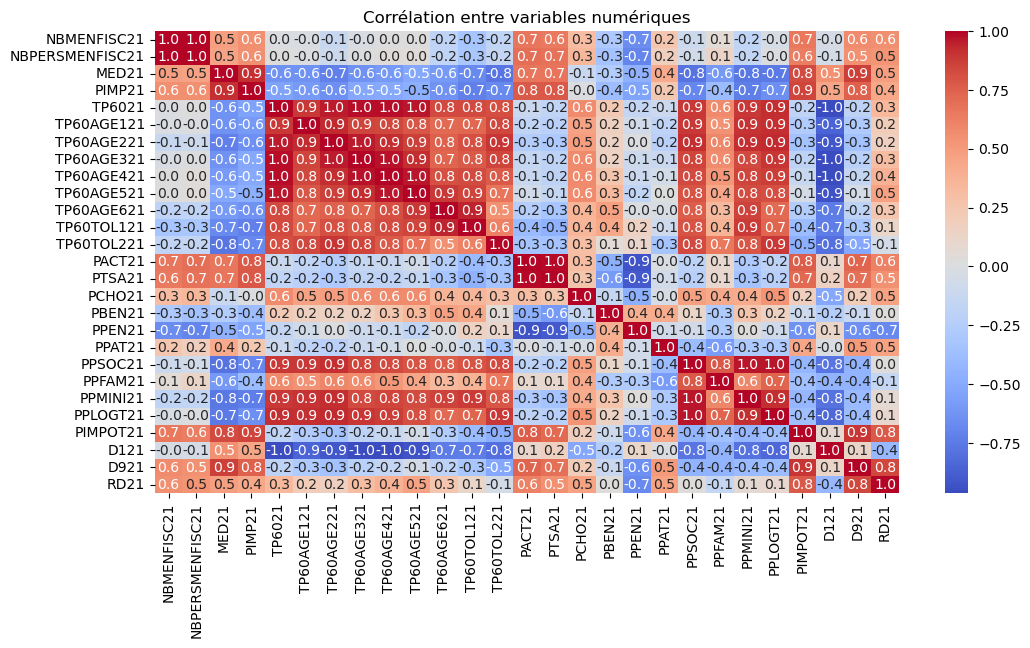

In [21]:
# Heatmap des corrélations pour guider la sélection des variables numériques
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Corrélation entre variables numériques")
plt.show()

In [22]:
corr_matrix = df.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(col, row, corr_matrix.loc[row, col]) 
             for col in upper.columns 
             for row in upper.index 
             if not pd.isnull(upper.loc[row, col]) and upper.loc[row, col] > 0.75]

for var1, var2, corr in high_corr:
    print(f"{var1} ↔ {var2} : {corr:.2f}")

NBPERSMENFISC21 ↔ NBMENFISC21 : 0.99
PIMP21 ↔ MED21 : 0.91
TP60AGE121 ↔ TP6021 : 0.89
TP60AGE221 ↔ TP6021 : 0.96
TP60AGE221 ↔ TP60AGE121 : 0.93
TP60AGE321 ↔ TP6021 : 0.98
TP60AGE321 ↔ TP60AGE121 : 0.85
TP60AGE321 ↔ TP60AGE221 : 0.96
TP60AGE421 ↔ TP6021 : 0.98
TP60AGE421 ↔ TP60AGE121 : 0.84
TP60AGE421 ↔ TP60AGE221 : 0.92
TP60AGE421 ↔ TP60AGE321 : 0.97
TP60AGE521 ↔ TP6021 : 0.96
TP60AGE521 ↔ TP60AGE121 : 0.79
TP60AGE521 ↔ TP60AGE221 : 0.86
TP60AGE521 ↔ TP60AGE321 : 0.92
TP60AGE521 ↔ TP60AGE421 : 0.97
TP60AGE621 ↔ TP6021 : 0.83
TP60AGE621 ↔ TP60AGE221 : 0.75
TP60AGE621 ↔ TP60AGE421 : 0.81
TP60AGE621 ↔ TP60AGE521 : 0.89
TP60TOL121 ↔ TP6021 : 0.83
TP60TOL121 ↔ TP60AGE221 : 0.81
TP60TOL121 ↔ TP60AGE321 : 0.77
TP60TOL121 ↔ TP60AGE421 : 0.82
TP60TOL121 ↔ TP60AGE521 : 0.85
TP60TOL121 ↔ TP60AGE621 : 0.95
TP60TOL221 ↔ MED21 : 0.78
TP60TOL221 ↔ TP6021 : 0.82
TP60TOL221 ↔ TP60AGE121 : 0.85
TP60TOL221 ↔ TP60AGE221 : 0.89
TP60TOL221 ↔ TP60AGE321 : 0.85
TP60TOL221 ↔ TP60AGE421 : 0.77
PACT21 ↔ PIMP21 :

In [23]:
# Sélection des variables d’après la corrélation et leur lien direct avec la pauvreté, le logement et les inégalités territoriales.
# Le but est de répondree à la problématique :
# Quels territoires cumulent des tensions immobilières, un faible niveau de vie et une offre limitée en logement social ?

colonnes_choisies = [
    "CODGEO",  # Code géographique
    "NBMENFISC21",  # Nombre de ménages fiscaux   
    "MED21",  # Médiane du niveau vie (€)
    "TP6021",  # Taux de pauvreté-Ensemble (%)
    "TP60TOL121", # Taux de pauvreté-locataires (%)
    "PPSOC21", # Part de l'ensemble de prestation sociales
    "PPLOGT21",  # dont part des prestations logement (%)
    "PACT21",  # Part des revenus d'activité (%)
    "PIMPOT21",  # Part des impôts (%)
]

revenus_selection = df[colonnes_choisies]
revenus_selection.head()

,CODGEO,NBMENFISC21,MED21,TP6021,TP60TOL121,PPSOC21,PPLOGT21,PACT21,PIMPOT21
0,01,270138,24810,10.8,5.0,3.8,0.7,79.1,15.9
1,02,224492,20920,18.8,8.4,7.7,1.5,68.4,13.8
2,03,160041,21500,16.2,8.8,6.5,1.3,61.5,13.7
3,04,72855,21790,17.1,9.6,5.5,1.2,59.9,14.5
4,05,65683,22010,14.7,8.8,5.2,1.0,63.0,14.4


**Avant de sauvegarder le fichier CSV pour des analyses futures**, formater la colonne `CODGEO` (code département)  
en chaîne de caractères (`str`) avec complétion par zéro à gauche (`zfill(2)`).  
Cela garantit l'alignement entre les fichiers lors des jointures.  
Par exemple : `1` devient `01`, et les départements d’outre-mer (`974`, `976`, etc.) restent inchangés.

In [ ]:
# Forcer le code département à deux chiffres (ex : '01', '35', '974') dans le df revenus_selection (avec les colonnes choisies)
revenus_selection = revenus_selection.copy()
revenus_selection['CODGEO'] = revenus_selection['CODGEO'].astype(str).str.zfill(2)

In [28]:
# Forcer le code département à deux chiffres (ex : '01', '35', '974') dans le df complet (toutes les colonnes) mais déjà néttoyé 
df = df.copy()
df['CODGEO'] = df['CODGEO'].astype(str).str.zfill(2)

### **Sauvegarder les deux noveaux fichiers :**  
- `revenus_2021_DEP_nettoye.csv` : fichier complet nettoyé, toutes colonnes.
- `revenus_2021_DEP_projet.csv` : fichier réduit, colonnes sélectionnées pour le projet.

In [29]:
# Sauvegarde du fichier complet nettoyé
df.to_csv("revenus_2021_DEP_nettoye.csv", index=False)

# Sauvegarde du fichier réduit pour le projet
revenus_selection.to_csv("revenus_2021_DEP_projet.csv", index=False)